# Práctica 5. Regresión logística

Es un análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras.

In [1]:
# Importamos las librerías y paquetes

from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#Aqui se carga el dataset
def load_dataset(filename):
    #Como un Dataframe
    data = read_csv(filename, header=None)
    #Creamos una matriz con los datos
    dataset = data.values
    #Dividimos en X y y
    X = dataset[:, :-1]
    y = dataset[:,-1]
    #Forzamos el tipo string
    X = X.astype(str)
    return X, y
 
#Entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [7]:
#Dataset
file = "insurance.csv"
X, y = load_dataset(file)

#Se dividen los datos en entrada, X
#salida  y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Busqueda de modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Modelo
yhat = model.predict(X_test_enc)

#Evaluacion del modelo 
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy/exactitud: 26.02 %


In [10]:
#Características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 4.497293
Característica 1: 5.380928
Accuracy/exactitud: 26.02 %


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


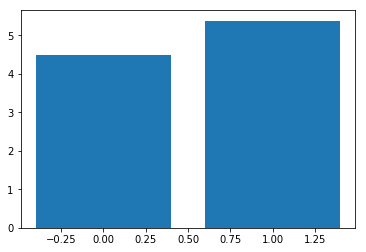

In [11]:
#Dataset
file = "insurance.csv"
X, y = load_dataset(file)

#Se dividen los datos en entrada, X
#salida  y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Busqueda de modelo
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Busqueda de modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Modelo
yhat = model.predict(X_test_fs)


#Evaluacion del modelo 
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

In [14]:
#Características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.000000
Característica 1: 0.026415
Accuracy/exactitud: 26.02 %


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


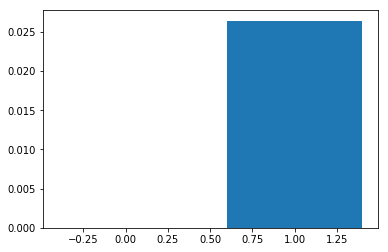

In [15]:
#Dataset
file = "insurance.csv"
X, y = load_dataset(file)

#Se dividen los datos en entrada, X
#salida  y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
#X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Busqueda delmodelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Modelo Encotnrado
yhat = model.predict(X_test_fs)

#Evaluacion modelo 
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')